In [1]:
import numpy as np
import scipy as sp
from scipy import signal
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

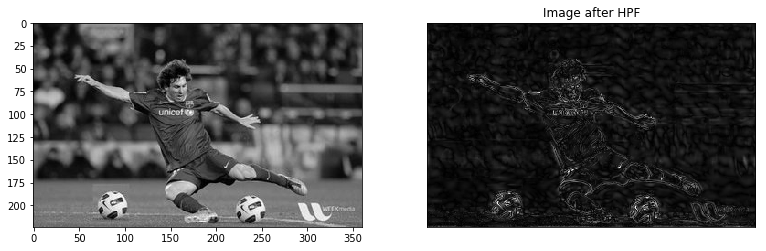

In [14]:
img = cv2.imread('messi.jpg', 0) # Load in grayscale

# fft to convert the image to freq domain 
f = np.fft.fft2(img)

# shift the center
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# remove the low frequencies by masking with a rectangular window of size 60x60
# High Pass Filter (HPF)
fshift[crow+11:crow+30, ccol-30:ccol-11] = -1
fshift[crow+11:crow+30, ccol-10:ccol+10] = 0
fshift[crow+11:crow+30, ccol+11:ccol+30] = 1

fshift[crow-10:crow+10, ccol-30:ccol-11] = -2
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
fshift[crow-10:crow+10, ccol+11:ccol+30] = 2

fshift[crow-30:crow-11, ccol-30:ccol-11] = -1
fshift[crow-30:crow-11, ccol-10:ccol+10] = 0
fshift[crow-30:crow-11, ccol+11:ccol+30] = 1


# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)


plt.figure(figsize=(20,20))

plt.subplot(131),plt.imshow(img, cmap = 'gray')

plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.show()


